# Generate example platemap figure to represent the plates

Note: There are 10 plates in this targeted fibrosis drug screen have the same layout (e.g., placement of treatments and cell types) but different compound treatments. We can create one representative platemap labelling treatment and cell type for these plates.

There is an 11th platemap layout that is a partial plate (uses less wells) that will have it's own representative platemap figure.

## Import libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”


## Set paths

In [2]:
# directory for fig to be outputted
output_dir <- file.path("./platemap_fig")

# Create the output directory if it doesn't exist
if (!dir.exists(output_dir)) {
  dir.create(output_dir, recursive = TRUE)
}

# path to one platemap file since all have same layout but different compounds
platemap_file_full <- file.path("./Target_Selective_Library_Screen_Plate_1.csv")
platemap_file_partial <- file.path("./Target_Selective_Library_Screen_Plate_11.csv") 

# Directory for example platemap figures
output_fig_full_plates <- file.path(output_dir, "example_platemap_full_plates.png")
output_fig_partial_plate <- file.path(output_dir, "example_platemap_partial_plate.png")

## Load in platemap file

In [3]:
platemap_df_full <- readr::read_csv(
    platemap_file_full,
    col_types = readr::cols(.default = "c")
)

# Add new column for "condition" to plot on platemap for DMSO versus compound
platemap_df_full <- platemap_df_full %>%
    mutate(condition = ifelse(treatment == "DMSO", "DMSO", 
                              ifelse(grepl("^UCD", treatment), "compound", 
                                    ifelse(treatment == "TGFRi", "TGFRi", NA))))


print(dim(platemap_df_full))
head(platemap_df_full)

[1] 60  8


WellRow,WellCol,well_position,heart_number,cell_type,heart_failure_type,treatment,condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
B,2,B02,7,healthy,NA,DMSO,DMSO
B,3,B03,19,failing,dilated_cardiomyopathy,UCD-0159256,compound
B,4,B04,19,failing,dilated_cardiomyopathy,UCD-0001766,compound
B,5,B05,7,healthy,NA,DMSO,DMSO
B,6,B06,19,failing,dilated_cardiomyopathy,UCD-0159262,compound
B,7,B07,19,failing,dilated_cardiomyopathy,UCD-0001915,compound


In [4]:
platemap_df_partial <- readr::read_csv(
    platemap_file_partial,
    col_types = readr::cols(.default = "c")
)

# Add new column for "condition" to plot on platemap for DMSO versus compound
platemap_df_partial <- platemap_df_partial %>%
    mutate(condition = ifelse(treatment == "DMSO", "DMSO", 
                              ifelse(grepl("^UCD", treatment), "compound", 
                                    ifelse(treatment == "TGFRi", "TGFRi", NA))))


print(dim(platemap_df_partial))
head(platemap_df_partial)

[1] 46  8


WellRow,WellCol,well_position,heart_number,cell_type,heart_failure_type,treatment,condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
B,2,B02,7,healthy,NA,DMSO,DMSO
B,3,B03,19,failing,dilated_cardiomyopathy,UCD-0159632,compound
B,4,B04,19,failing,dilated_cardiomyopathy,UCD-0159640,compound
B,5,B05,7,healthy,NA,DMSO,DMSO
B,6,B06,19,failing,dilated_cardiomyopathy,UCD-0001952,compound
B,7,B07,19,failing,dilated_cardiomyopathy,UCD-0159654,compound


## Create example platemaps and save figures

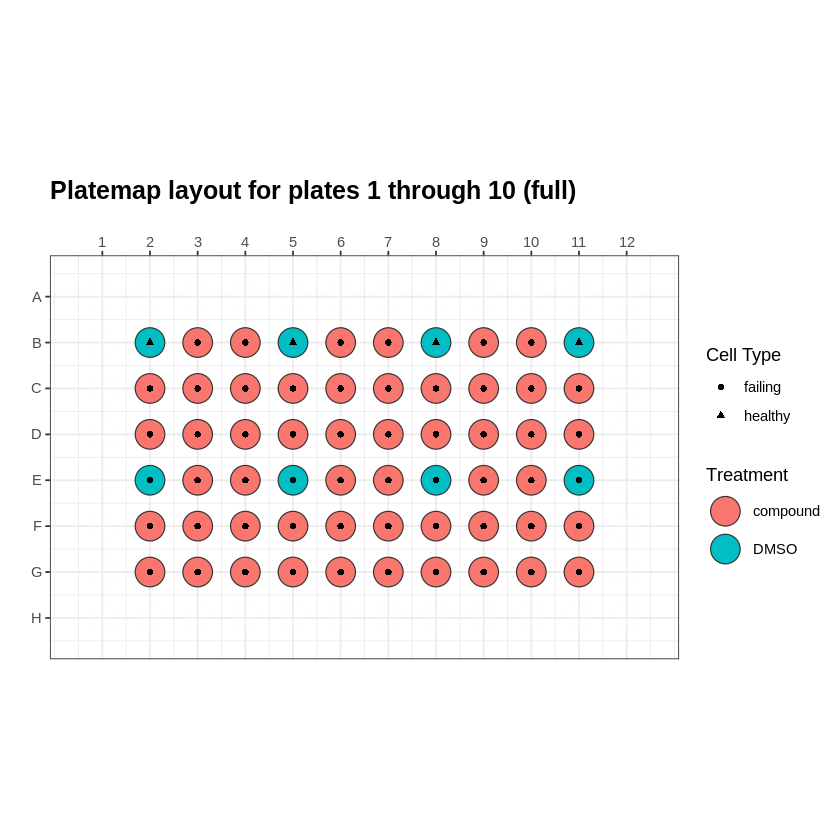

In [5]:
plates_full_gg <-
    platetools::raw_map(
        data = platemap_df_full$condition, # nolint
        well = platemap_df_full$well_position,
        plate = 96,
        size = 8
    ) +
    ggtitle("Platemap layout for plates 1 through 10 (full)") +
    theme(plot.title = element_text(size = 15, face = "bold")) +
    ggplot2::geom_point(aes(shape = platemap_df_full$cell_type)) +
    ggplot2::scale_shape_discrete(name = "Cell Type") +
    ggplot2::scale_fill_discrete(name = "Treatment")

ggsave(
    output_fig_full_plates,
    plates_full_gg,
    dpi = 500,
    height = 3.5,
    width = 6
)

plates_full_gg

Warning message:
“Warning: Your well label count ( 46 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


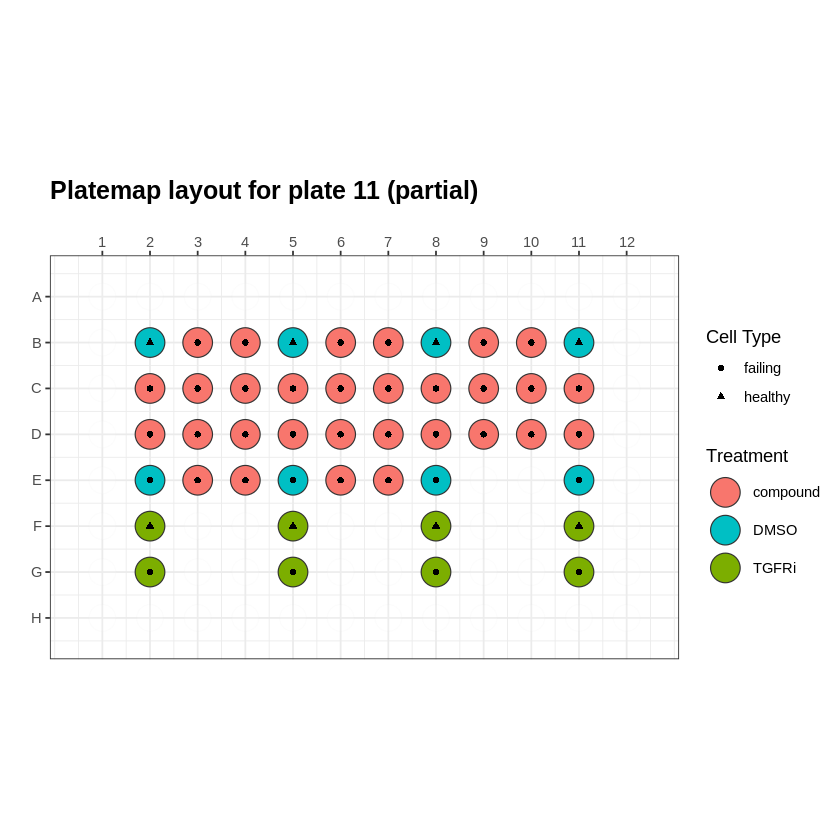

In [6]:
plates_partial_gg <-
    platetools::raw_map(
        data = platemap_df_partial$condition, # nolint
        well = platemap_df_partial$well_position,
        plate = 96,
        size = 8
    ) +
    ggtitle("Platemap layout for plate 11 (partial)") +
    theme(plot.title = element_text(size = 15, face = "bold")) +
    ggplot2::geom_point(aes(shape = platemap_df_partial$cell_type)) +
    ggplot2::scale_shape_discrete(name = "Cell Type") +
    ggplot2::scale_fill_manual(name = "Treatment",
                               values = c("compound" = "#F8766D", 
                                          "DMSO" = "#00BFC4",
                                          "TGFRi" = "#7CAE00")) # Assign the default colors to match the previous full platemap layouts

ggsave(
    output_fig_partial_plate,
    plates_partial_gg,
    dpi = 500,
    height = 3.5,
    width = 6
)

plates_partial_gg
